In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, TextVectorization, Embedding, Bidirectional
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score

/Users/maulvizm/Education/Machine Learning/if3270-tubes-2/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Load data
train_df = pd.read_csv('../../../data/nusax/train.csv')
valid_df = pd.read_csv('../../../data/nusax/valid.csv')

# Prepare text vectorization
max_tokens = 10000  # Maximum number of words to keep
max_sequence_length = 100  # Maximum length of text sequences

text_vectorizer = TextVectorization(
    max_tokens=max_tokens,
    output_sequence_length=max_sequence_length,
    standardize='lower_and_strip_punctuation'
)

# Adapt the vectorizer to the training data
text_vectorizer.adapt(train_df['text'].values)

# Convert labels to numeric
label_map = {'positive': 0, 'neutral': 1, 'negative': 2}
train_df['label'] = train_df['label'].map(label_map)
valid_df['label'] = valid_df['label'].map(label_map)

# Prepare datasets
x_train = text_vectorizer(train_df['text'])
y_train = train_df['label']
x_val = text_vectorizer(valid_df['text'])
y_val = valid_df['label']

In [3]:
### Variasi 1: Unidirectional RNN
model_1 = Sequential([
    Embedding(max_tokens, 128, input_length=max_sequence_length),
    SimpleRNN(64, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_1 = model_1.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/20


/Users/maulvizm/Education/Machine Learning/if3270-tubes-2/.venv/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.3372 - loss: 1.1565 - val_accuracy: 0.4400 - val_loss: 1.0483
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5452 - loss: 0.9385 - val_accuracy: 0.4600 - val_loss: 1.1999
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6311 - loss: 0.7071 - val_accuracy: 0.3900 - val_loss: 1.3154
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7465 - loss: 0.5463 - val_accuracy: 0.4800 - val_loss: 1.4282
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7663 - loss: 0.4535 - val_accuracy: 0.3900 - val_loss: 1.5453
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7896 - loss: 0.4599 - val_accuracy: 0.4100 - val_loss: 1.5590
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9015 - loss: 0.3041 - val_accuracy: 0.3900 - val_loss: 1.5410
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9756 - loss: 0.1710 - val_accuracy: 0.3900 - val_loss: 1.6288
Epoch 9/20


In [4]:
### Variasi 2: Bidirectional RNN
model_2 = Sequential([
    Embedding(max_tokens, 128, input_length=max_sequence_length),
    Bidirectional(SimpleRNN(64, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(SimpleRNN(64, return_sequences=False)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_2 = model_2.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.3282 - loss: 1.1391 - val_accuracy: 0.5200 - val_loss: 0.9974
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5335 - loss: 0.9305 - val_accuracy: 0.5200 - val_loss: 0.9929
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6894 - loss: 0.7333 - val_accuracy: 0.5000 - val_loss: 1.0115
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8801 - loss: 0.4725 - val_accuracy: 0.5900 - val_loss: 0.9354
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9499 - loss: 0.2663 - val_accuracy: 0.5400 - val_loss: 1.0952
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9918 - loss: 0.1003 - val_accuracy: 0.5100 - val_loss: 1.1761
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9951 - loss: 0.0364 - val_accuracy: 0.5200 - val_loss: 1.2058
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.0126 - val_accuracy: 0.5100 - val_loss: 1.3360



Evaluating Model 1 (Unidirectional RNN):
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
              precision    recall  f1-score   support

           0       0.60      0.47      0.53        38
           1       0.31      0.21      0.25        24
           2       0.43      0.61      0.50        38

    accuracy                           0.46       100
   macro avg       0.45      0.43      0.43       100
weighted avg       0.46      0.46      0.45       100

Macro F1-score: 0.4265


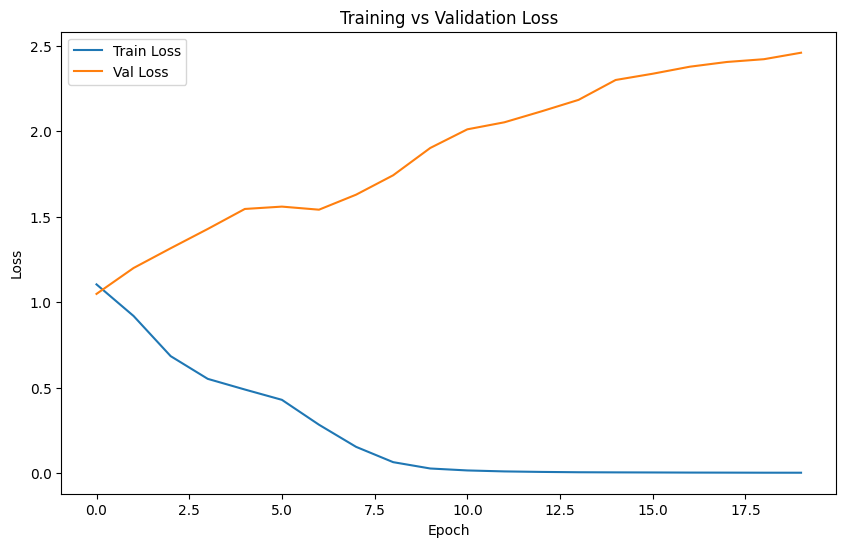


Evaluating Model 2 (Bidirectional RNN):
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
              precision    recall  f1-score   support

           0       0.60      0.47      0.53        38
           1       0.47      0.79      0.59        24
           2       0.37      0.29      0.32        38

    accuracy                           0.48       100
   macro avg       0.48      0.52      0.48       100
weighted avg       0.48      0.48      0.47       100

Macro F1-score: 0.4822


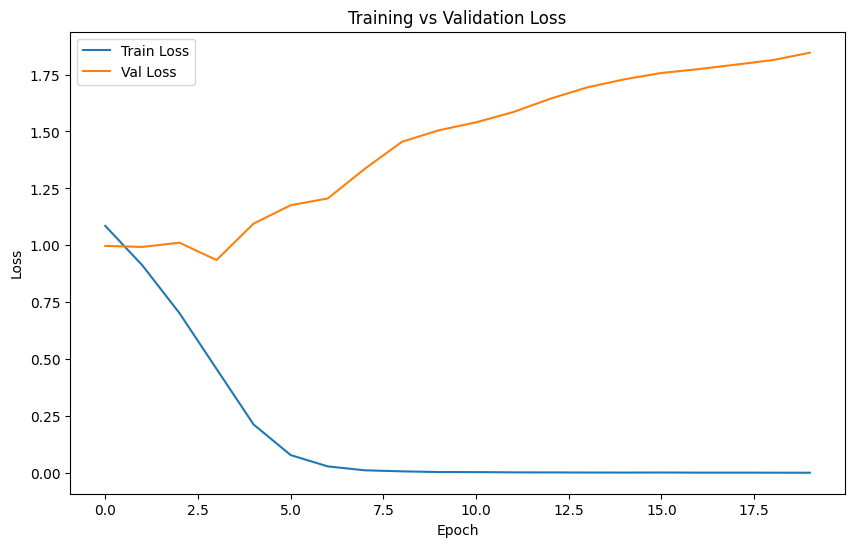

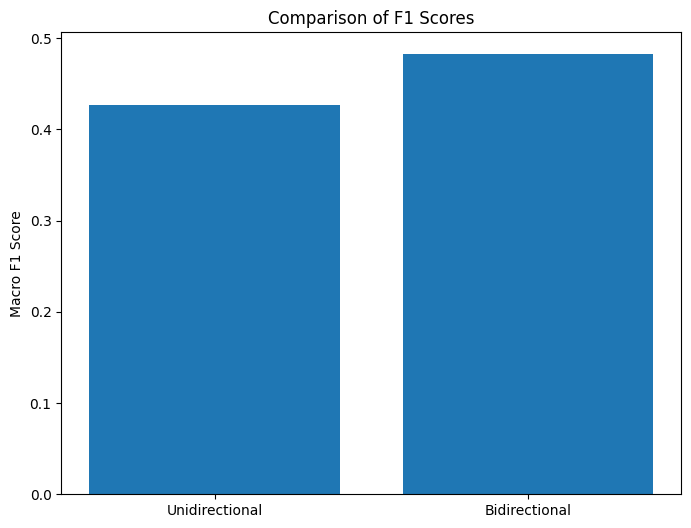

In [5]:
def evaluate_model(model, x_val, y_val, history):
    y_pred = model.predict(x_val)
    y_pred_classes = y_pred.argmax(axis=1)
    
    f1 = f1_score(y_val, y_pred_classes, average='macro')
    print(classification_report(y_val, y_pred_classes))
    print(f"Macro F1-score: {f1:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    return f1

# Evaluate all models
print("\nEvaluating Model 1 (Unidirectional RNN):")
f1_1 = evaluate_model(model_1, x_val, y_val, history_1)

print("\nEvaluating Model 2 (Bidirectional RNN):")
f1_2 = evaluate_model(model_2, x_val, y_val, history_2)

# Compare F1 scores
plt.figure(figsize=(8, 6))
plt.bar(['Unidirectional', 'Bidirectional'], [f1_1, f1_2])
plt.title('Comparison of F1 Scores')
plt.ylabel('Macro F1 Score')
plt.show()